In [1]:
from nnlearn.Compress import *
from nnlearn.Network import sigmoid
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image

(6, 6)


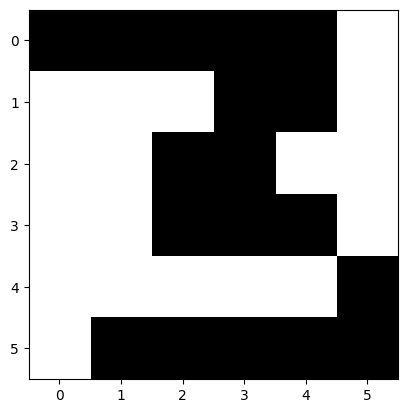

In [2]:
img = image.imread("nnlearn/digit_3.png")[:,:,0]

scale_down_factor = 50

temp_x = np.arange(452) % scale_down_factor == 0
temp_y = np.arange(451) % scale_down_factor == 0
img = img[temp_x, :]
img = img[:,temp_y]

img = img[2:-2,2:-2]

img = sigmoid(img*100)

print(img.shape)
plt.imshow(img, cmap = 'Greys')
plt.show()

In [3]:
compresser_small = nn_image_compresser(hidden_layers = 2, layer_width = 3)

compresser_wide = nn_image_compresser(hidden_layers = 4, layer_width = 3)

compresser_tall = nn_image_compresser(hidden_layers = 2, layer_width = 10)

compressr_large = nn_image_compresser(hidden_layers = 4, layer_width = 7)



In [6]:
eps = 1_000

compresser_small.fit(img, batch_size = None, epochs = eps, verbose = True, learn_coef_bounds = (.2,.1))

# compresser_wide.fit(img, batch_size = None, epochs = eps, verbose = False, learn_coef_bounds = (.2,.1))

# compresser_tall.fit(img, batch_size = None, epochs = eps, verbose = False, learn_coef_bounds = (.2,.1))

compressr_large.fit(img, batch_size = None, epochs = eps, verbose = True, learn_coef_bounds = (.2,.1))

--------------------
epoch: 1001 
 loss: 0.0625
--------------------
epoch: 1201 
 loss: 0.0625
--------------------
epoch: 1401 
 loss: 0.0625
--------------------
epoch: 1601 
 loss: 0.0625
--------------------
epoch: 1801 
 loss: 0.0625
--------------------
epoch: 2000 
 loss: 0.0625
--------------------
epoch: 1001 
 loss: 0.056
--------------------
epoch: 1201 
 loss: 0.0523
--------------------
epoch: 1401 
 loss: 0.0374
--------------------
epoch: 1601 
 loss: 0.0358
--------------------
epoch: 1801 
 loss: 0.0458
--------------------
epoch: 2000 
 loss: 0.0401


[0.     0.     0.     ... 0.     0.     0.0625]


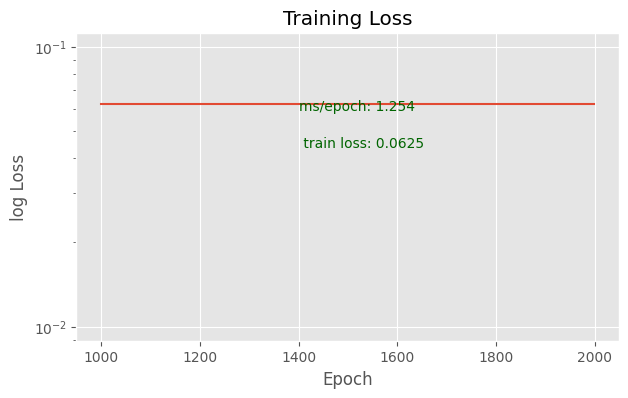

In [7]:
compresser_small.network.graph_loss_history()

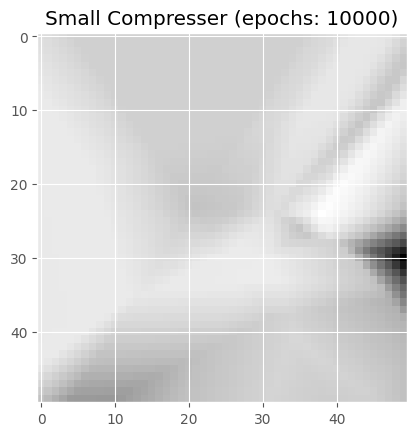

In [ ]:
recreated_image = compresser_small.create_image(50,50)

plt.imshow(recreated_image, cmap = 'Greys')
plt.title(f"Small Compresser (epochs: {compresser_small.network.epochs_trained})")


plt.show()

